In [1]:
import numpy as np


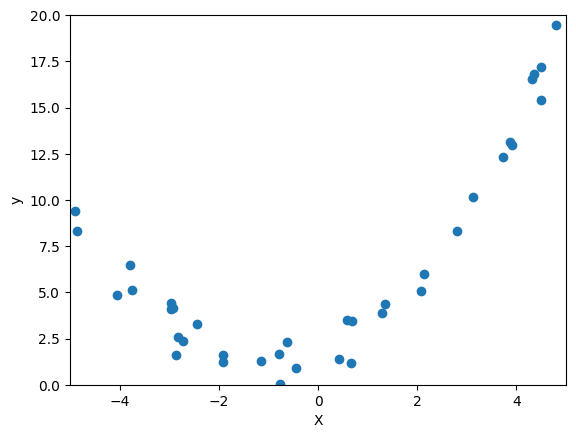

In [2]:
import matplotlib.pyplot as plt
np.random.seed(100)
m = 100
X = 10 * np.random.randn(m,1)-3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
plt.xlabel("X")
plt.ylabel("y")
plt.xlim(-5, 5) 
plt.ylim(0, 20)
plt.scatter(X,y)
plt.show()

In [3]:
# Adding the sq. of each feature in the training set as new feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(include_bias = False) # default degree is 2
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-20.49765473]
[-20.49765473 420.15384945]


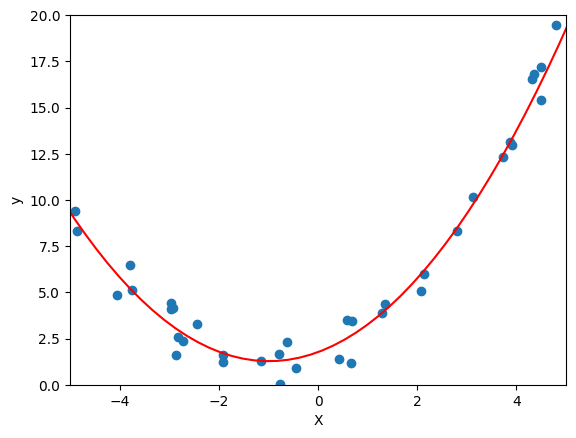

In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
intercept = lin_reg.intercept_[0]
coef_1 = lin_reg.coef_[0, 0]  
coef_2 = lin_reg.coef_[0, 1]
X_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
predict_line = intercept + coef_1 * X_line + coef_2 * (X_line ** 2)

plt.xlabel("X")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(0, 20)
plt.scatter(X, y)
plt.plot(X_line, predict_line, color='red')  
plt.show()


**LEARNING CURVE**

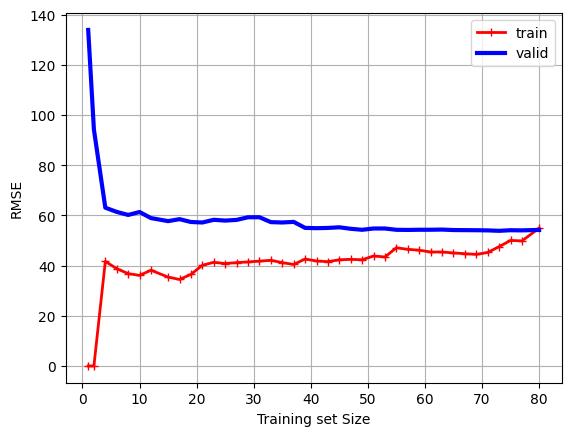

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
train_sizes,train_scores,valid_scores = learning_curve(LinearRegression() , X, y,train_sizes = np.linspace(0.01,1.0,40),cv=5,
                                                       scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")
plt.xlabel("Training set Size")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
train_sizes.shape

(40,)

In [7]:
train_scores.shape

(40, 5)

In [8]:
valid_scores.shape

(40, 5)

In [9]:
train_errors.shape

(40,)

In [10]:
valid_scores.shape

(40, 5)

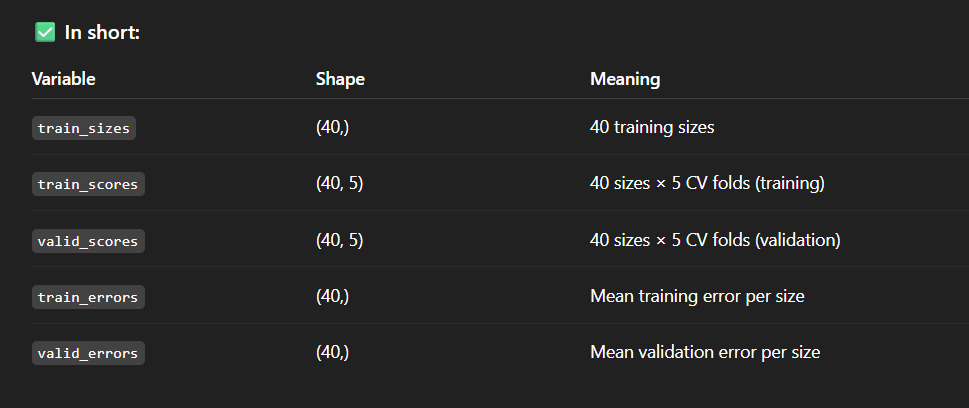

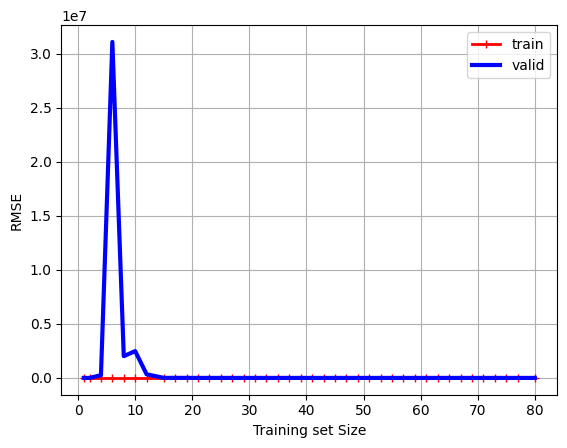

In [11]:
from sklearn.pipeline import make_pipeline
poly_reg = make_pipeline(PolynomialFeatures(degree=10,include_bias=False),LinearRegression())
train_sizes,train_scores,valid_scores = learning_curve(poly_reg , X, y,train_sizes = np.linspace(0.01,1.0,40),cv=5,
                                                       scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")
plt.xlabel("Training set Size")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.show()